# Imports

In [11]:
%matplotlib inline
import spacy
from spacy.tokens.doc import Doc
import pandas as pd
from collections import Counter
from datetime import datetime
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load('en')

In [3]:
test_loc = 'test_dump.bin'
train_loc = 'train_dump.bin'

# Read data

In [7]:
train = pd.read_csv('../data/train.csv').fillna('')
test = pd.read_csv('../data/test.csv').fillna('')
print train.shape, test.shape

(404290, 6) (2345796, 3)


# Write training questions
In the order they appear, not the order of their ids

In [46]:
# with open(train_loc, 'wb') as file_:
#     for idx, question in enumerate(train_array):
#         if idx % 10000 == 0: print(idx, question)
#         file_.write(nlp(question.decode('utf-8')).to_bytes())
with open(train_loc, 'wb') as file_:
    for i in range(len(train)):
        f = train.loc[i]
        if i % 10000 == 0: print i, f['question2']
        file_.write(nlp(f['question1'].decode('utf-8')).to_bytes())
        file_.write(nlp(f['question2'].decode('utf-8')).to_bytes())

0 What is the step by step guide to invest in share market?
10000 Is it safe for a woman to travel alone in Japan?
20000 What triggers you the most when you play video games?
30000 Is domino's pizza halal?
40000 How should I start learning Python for Data Science?
50000 Why is cloning considered unethical?
60000 How do you get rid of a virus on an iPhone?
70000 What are some teenage cake ideas?
80000 How do I recover deleted files on an Android phone or tablet?
90000 Which are the best Hollywood movies of 2016?
100000 What is the process of getting a surgical residency in UK after completing MBBS from India?
110000 How do I become an entrepreneur?
120000 How can I become a billionaire?
130000 What is it like to grow up in Japan, SIngapore and Hong Kong?
140000 Which is a good car in the range of 2-3lacs on Delhi road?
150000 How do I grow my hair really fast and easiest way?
160000 What are the career options after graduating with a B.A. in philosophy?
170000 Is welfare a citizenship r

# Read training data
Elements $(2n, 2n+1)$ are the questions for pair $n$

In [4]:
docs = []
i = 0
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
with open(train_loc, 'rb') as file_:
    for byte_string in Doc.read_bytes(file_):
        if i%10000 == 0: print i, datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        docs.append(Doc(nlp.vocab).from_bytes(byte_string))
        i += 1
#         if i == 10: break
print datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(type(docs[0]))

2017-05-13 16:58:08
0 2017-05-13 16:58:08
10000 2017-05-13 16:58:12
20000 2017-05-13 16:58:14
30000 2017-05-13 16:58:15
40000 2017-05-13 16:58:16
50000 2017-05-13 16:58:17
60000 2017-05-13 16:58:18
70000 2017-05-13 16:58:19
80000 2017-05-13 16:58:20
90000 2017-05-13 16:58:22
100000 2017-05-13 16:58:23
110000 2017-05-13 16:58:24
120000 2017-05-13 16:58:25
130000 2017-05-13 16:58:27
140000 2017-05-13 16:58:28
150000 2017-05-13 16:58:29
160000 2017-05-13 16:58:31
170000 2017-05-13 16:58:32
180000 2017-05-13 16:58:33
190000 2017-05-13 16:58:34
200000 2017-05-13 16:58:36
210000 2017-05-13 16:58:38
220000 2017-05-13 16:58:39
230000 2017-05-13 16:58:40
240000 2017-05-13 16:58:41
250000 2017-05-13 16:58:42
260000 2017-05-13 16:58:44
270000 2017-05-13 16:58:45
280000 2017-05-13 16:58:46
290000 2017-05-13 16:58:48
300000 2017-05-13 16:58:49
310000 2017-05-13 16:58:50
320000 2017-05-13 16:58:51
330000 2017-05-13 16:58:53
340000 2017-05-13 16:58:54
350000 2017-05-13 16:58:55
360000 2017-05-13 16:5

In [9]:
print(docs[23986])
for word in docs[23986]:
    print(word.lemma_)

How can I lose weight quickly?
how
can
-PRON-
lose
weight
quickly
?


# Write test questions

In [50]:
print len(test)
with open(test_loc, 'wb') as file_:
    for i in range(len(test)):
        if i % 10000 == 0: print i
        f = test.loc[i]
        file_.write(nlp(f['question1'].decode('utf-8')).to_bytes())
        file_.write(nlp(f['question2'].decode('utf-8')).to_bytes())

2345796
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
13

# Read test questions

In [54]:
test_docs = []
i = 0
with open(test_loc, 'rb') as file_:
    for byte_string in Doc.read_bytes(file_):
        test_docs.append(Doc(nlp.vocab).from_bytes(byte_string))
        i += 1
print(type(test_docs[0]))

KeyboardInterrupt: 

In [ ]:
test_docs[1345288]

In [ ]:
testloc = 'test_serialize.bin'
with open(testloc, 'wb') as file_:
    file_.write(nlp(u'This is a document.').to_bytes())
    file_.write(nlp(u'This is another.').to_bytes())

In [7]:
docs = []
with open(testloc, 'rb') as file_:
    for byte_string in Doc.read_bytes(file_):
        docs.append(Doc(nlp.vocab).from_bytes(byte_string))
assert len(docs) == 2

In [8]:
p = docs[0]

In [12]:
bow = []
for word in p:
#     if word.is_stop: continue
    bow.append(word.lemma_)
Counter(bow)

Counter({u'.': 1, u'a': 1, u'be': 1, u'document': 1, u'this': 1})

In [17]:
print(test.loc[20])

test_id                                                     20
question1    How matter at MIT? Will performing poorly in 1...
question2    I have passed 5 AP tests with scores trump 5. ...
Name: 20, dtype: object


In [24]:
doc = docs[24890]
print doc
print(' '.join(word.lemma_ for word in doc))

What are some good books to read about Islamic philosophy?
what be some good book to read about islamic philosophy ?


In [25]:
lemmas = []
for idx, doc in enumerate(docs):
    lemma = []
    for word in doc:
        if not word.is_punct: lemma.append(word.lemma_)
    lemmas.append(lemma)
    if idx == 20: break

In [ ]:
print(type(lemmas[0][0]))

In [17]:
lens = []
i = 0
for doc in docs:
    lens.append(doc.__len__())
    i += 1
#     if i == 10: break
# print lens

[15, 13, 15, 20, 15, 11, 13, 12, 16, 8, 20, 21, 5, 12, 8, 10, 9, 13, 13, 10, 10, 20, 10, 9, 8, 9, 8, 7, 31, 31, 17, 18, 5, 5, 13, 9, 15, 14, 10, 10, 6, 8, 8, 11, 10, 8, 8, 12, 18, 12, 15, 16, 5, 7, 9, 8, 9, 10, 9, 15, 11, 10, 17, 12, 15, 16, 22, 10, 9, 7, 14, 15, 28, 20, 31, 40, 7, 8, 16, 16, 5, 7, 9, 8, 10, 10, 17, 8, 16, 17, 10, 10, 12, 10, 27, 14, 14, 11, 6, 5, 10, 11, 16, 14, 6, 7, 15, 13, 9, 8, 8, 14, 5, 19, 10, 9, 30, 21, 9, 7, 12, 5, 15, 15, 16, 10, 7, 10, 10, 10, 12, 10, 8, 11, 9, 10, 8, 5, 22, 12, 7, 11, 7, 6, 7, 9, 18, 10, 16, 19, 22, 34, 7, 5, 15, 23, 9, 14, 6, 13, 28, 17, 13, 16, 27, 24, 6, 10, 15, 15, 10, 6, 23, 23, 9, 9, 10, 10, 15, 15, 11, 19, 17, 30, 11, 11, 5, 7, 7, 11, 6, 6, 11, 9, 7, 5, 32, 21, 17, 13, 21, 11, 10, 8, 16, 17, 9, 9, 11, 11, 14, 16, 8, 5, 9, 9, 10, 12, 12, 26, 9, 8, 10, 12, 10, 13, 7, 8, 8, 12, 14, 5, 15, 28, 13, 18, 18, 17, 12, 6, 9, 15, 13, 16, 8, 9, 9, 9, 8, 14, 23, 7, 8, 8, 13, 8, 23, 20, 8, 8, 6, 7, 6, 7, 9, 8, 13, 8, 11, 7, 6, 6, 10, 10, 11, 9, 8,

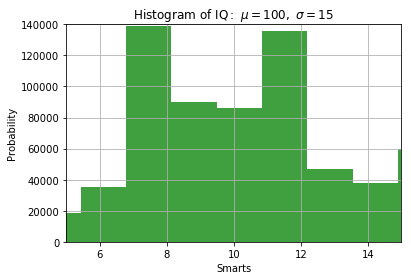

In [28]:
# the histogram of the data
n, bins, patches = plt.hist(lens, 200, facecolor='green', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of Sentence Lengths')
plt.axis([5,15, 0,140000])
plt.grid(True)

plt.show()
